# 435 HW1 Xiaowei Yuan

## 3.5

In [7]:
from autograd import grad 
from autograd import numpy as np
from mlrefined_libraries import math_optimization_library as optlib
import matplotlib.pyplot as plt
from autograd import value_and_grad 

In [8]:
static_plotter = optlib.static_plotter.Visualizer();

def gradient_descent(alpha,max_its,w):
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        grad_eval = grad(w)

        # take gradient descent step
        w = w - alpha*grad_eval
            
        # collect final weights
        cost_history.append(g(w))  
    return cost_history


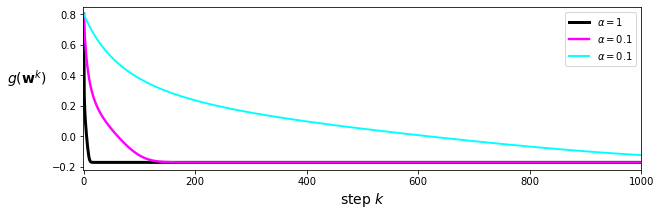

In [9]:
# initial point
w = 2.0
max_its = 1000

# first run
alpha = 10**(0)
cost_history_1 = gradient_descent(alpha,max_its,w)

alpha = 10**(-1)
cost_history_2 = gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
cost_history_3 = gradient_descent(alpha,max_its,w)

# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],start = 0,labels = [r'$\alpha = 1$',r'$\alpha = 0.1$',r'$\alpha = 0.01$'])

Conclusion:
    By comparing three lines, we can figure out when alpha = 1, gradient is too large, While when alpha = 0.01, gradient is too slow. Alpha = 0.1 is the best option.

## 3.8

In [10]:
# create the input function
g = lambda w: np.dot(w.T,w)[0][0]

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [11]:
N = 10
alpha_choice = 10**(0); max_its = 100; w = 10*np.ones((N,1));
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

alpha_choice = 10**(-2); 
weight_history_3,cost_history_3 = gradient_descent(g,alpha_choice,max_its,w)

# the import statement for matplotlib
import matplotlib.pyplot as plt


def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend()
    plt.show()

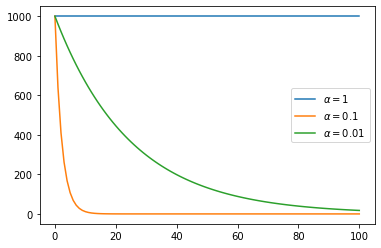

In [12]:
plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],labels = [r'$\alpha = 1$',r'$\alpha = 0.1$',r'$\alpha = 0.01$'])

## 3.9

In [17]:
def momentum(g,alpha_choice,beta,max_its,w):
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    cost_eval,grad_eval = gradient(w)
    
    # initialization for momentum direction
    h = np.zeros((w.shape))
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        #### momentum step - update exponential average of gradient directions to ameliorate zig-zagging ###
        h = beta*h - (1 - beta)*grad_eval

        # take gradient descent step
        w = w + alpha*h
            
    # collect final weights
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history

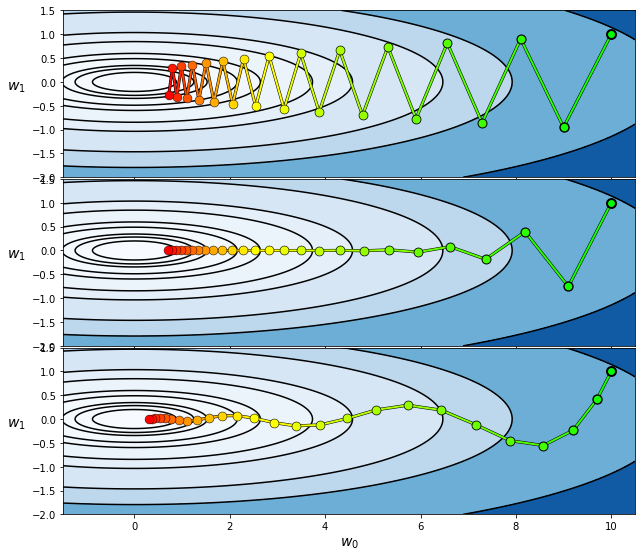

In [18]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])

g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]); max_its = 25; alpha_choice = 10**(-1);
beta = 0
weight_history_1,cost_history_1 = momentum(g,alpha_choice,beta,max_its,w)

beta = 0.1;
weight_history_2,cost_history_2 = momentum(g,alpha_choice,beta,max_its,w)

beta = 0.7
weight_history_3,cost_history_3 = momentum(g,alpha_choice,beta,max_its,w)

# show run in both three-dimensions and just the input space via the contour plot
histories = [weight_history_1,weight_history_2,weight_history_3]
gs = [g,g,g]
static_plotter.two_input_contour_vert_plots(gs,histories,num_contours = 25,xmin = -1.5,xmax = 10.5,ymin = -2.0,ymax = 1.5)

## 3.10

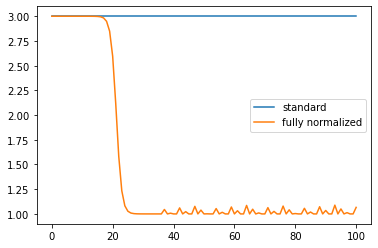

In [13]:
def gradient_descent(g,alpha_choice,max_its,w,version):
    gradient = value_and_grad(g)
    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
        
        # normalize components
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm
            
        if version == 'none':
            grad_eval = grad_eval

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history
# define function
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1
w = np.array([1.0,2.0]); max_its = 100; alpha_choice = 10**(-1);

version = 'none'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)
version = 'full'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)
plot_cost_histories([cost_history_1,cost_history_2],labels = ['standard','fully normalized'])

Conclusion: by comparing two plots, we can see the fully normalized line is sharply down while standard line keeps the same.

## 3.11

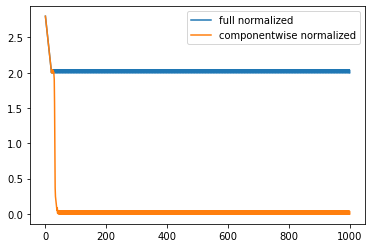

In [14]:
# define function
g = lambda w: np.max(np.tanh(4*w[0] + 4*w[1]),0) + np.max(np.abs(0.4*w[0]),0) + 1
w = np.array([2.0,2.0]); max_its = 1000; alpha_choice = 10**(-1);

version = 'full'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)

version = 'component'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)

plot_cost_histories([cost_history_1,cost_history_2],labels = ['full normalized','componentwise normalized'])